# Convolucional

In [26]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical


In [27]:
model = Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
__________________________________________________

In [29]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images = test_images.astype('float32') / 255

In [30]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [31]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [32]:
model.fit(
    train_images,
    train_labels,
    batch_size=100,
    epochs=10
)

Epoch 1/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.9526 - accuracy: 0.7480
Epoch 2/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.2555 - accuracy: 0.9261
Epoch 3/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.1845 - accuracy: 0.9464
Epoch 4/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.1479 - accuracy: 0.9564
Epoch 5/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.1266 - accuracy: 0.9626
Epoch 6/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.1119 - accuracy: 0.9673
Epoch 7/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.1010 - accuracy: 0.9703
Epoch 8/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0930 - accuracy: 0.9730
Epoch 9/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0863 - accuracy: 0.9748
Epoch 10/10
60000/60000 [============

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 77us/step
Test accuracy: 0.9779000282287598


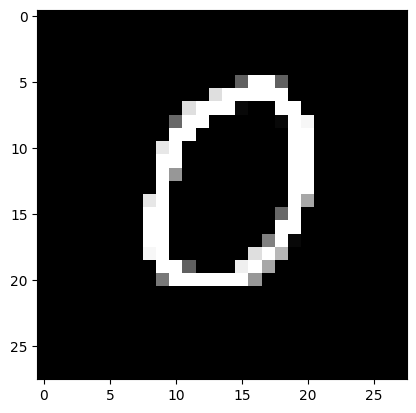

0 | 94%
1 | 0%
2 | 0%
3 | 0%
4 | 0%
5 | 0%
6 | 0%
7 | 0%
8 | 0%
9 | 5%
más probable, 0


In [120]:
# open the image image2.png
from keras.preprocessing import image
img = image.load_img('image2.jpg', target_size=(28, 28), color_mode='grayscale')
# show the image with plt
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.show()

# predict the digit
import numpy as np
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x.reshape(1, 28, 28, 1)
x = x.astype('float32') / 255
prediction = model.predict(x)
for i,pred in enumerate(prediction[0]):
    print(i,"|",str(int(pred * 100))+"%")
print("más probable,",prediction.argmax())